<div align="center">
<h2>基于CNN的手写数字识别</h2>
</div>

<div align="center">
<em>2025年12月16日</em></p>

<p>
<u>柯维</u><br>
<u>202421324924</u></p>
</div>

#### 训练数据
先定义划分函数

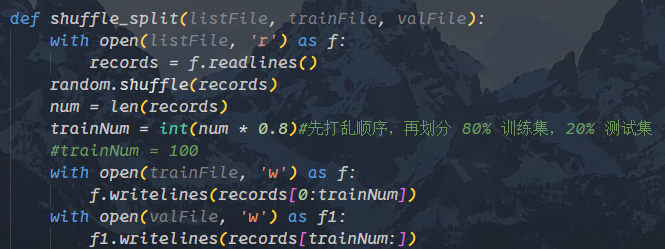

In [11]:
from IPython.display import Image, display

display(Image(filename='pictures/loader.png'))

划分80%训练集，20%测试集，随机采样。

- 在主训练函数中，首先创建输出目录，使用自定义shuffle函数将图像打乱，并将图像分为训练集和测试集。再使用totensor预处理将传入图片的像素值归一化到0-1之间。

- 设置自定义dataloader加载数据集，并设置batchsize大小。

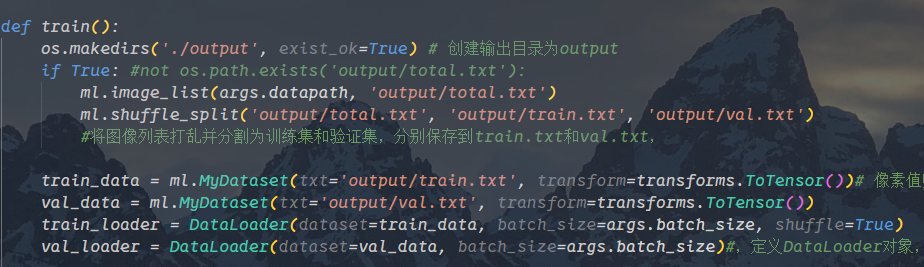

In [10]:
from IPython.display import Image, display

display(Image(filename='pictures/train_dataset.png'))

卷积神经网络如下

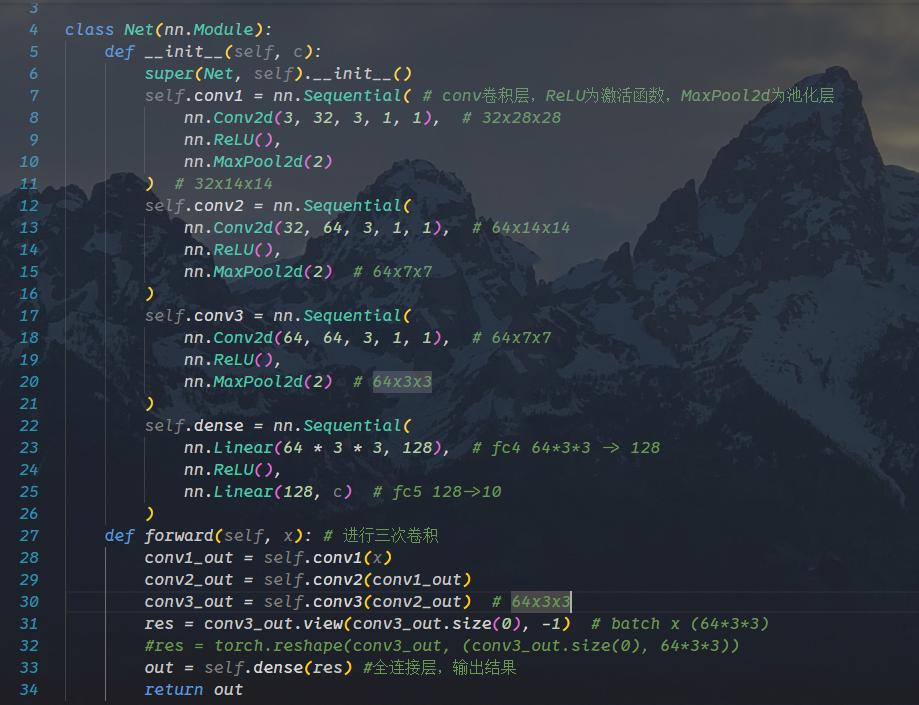

In [8]:
from IPython.display import Image, display

display(Image(filename='pictures/cnn.png'))

- conv1，2，3都是由一个卷积层，一个ReLU层，一个最大池化层组成。经过三次卷积后进行全连接。

训练时阶梯调整学习速率，初始时为0.01，在第20,30个epoch降低为原来的0.1倍。

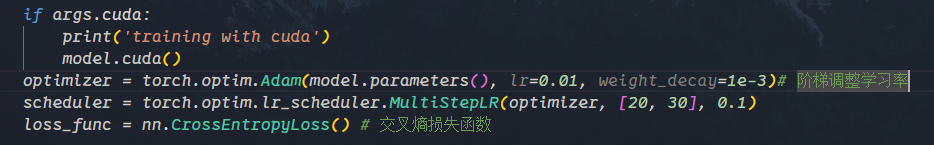

In [12]:
from IPython.display import Image, display

display(Image(filename='pictures/learning_rate.png'))


训练中添加断点，batch_x为 $256*3*28*28$张量
其中3表示rgb3通道，$28*28$表示图片大小

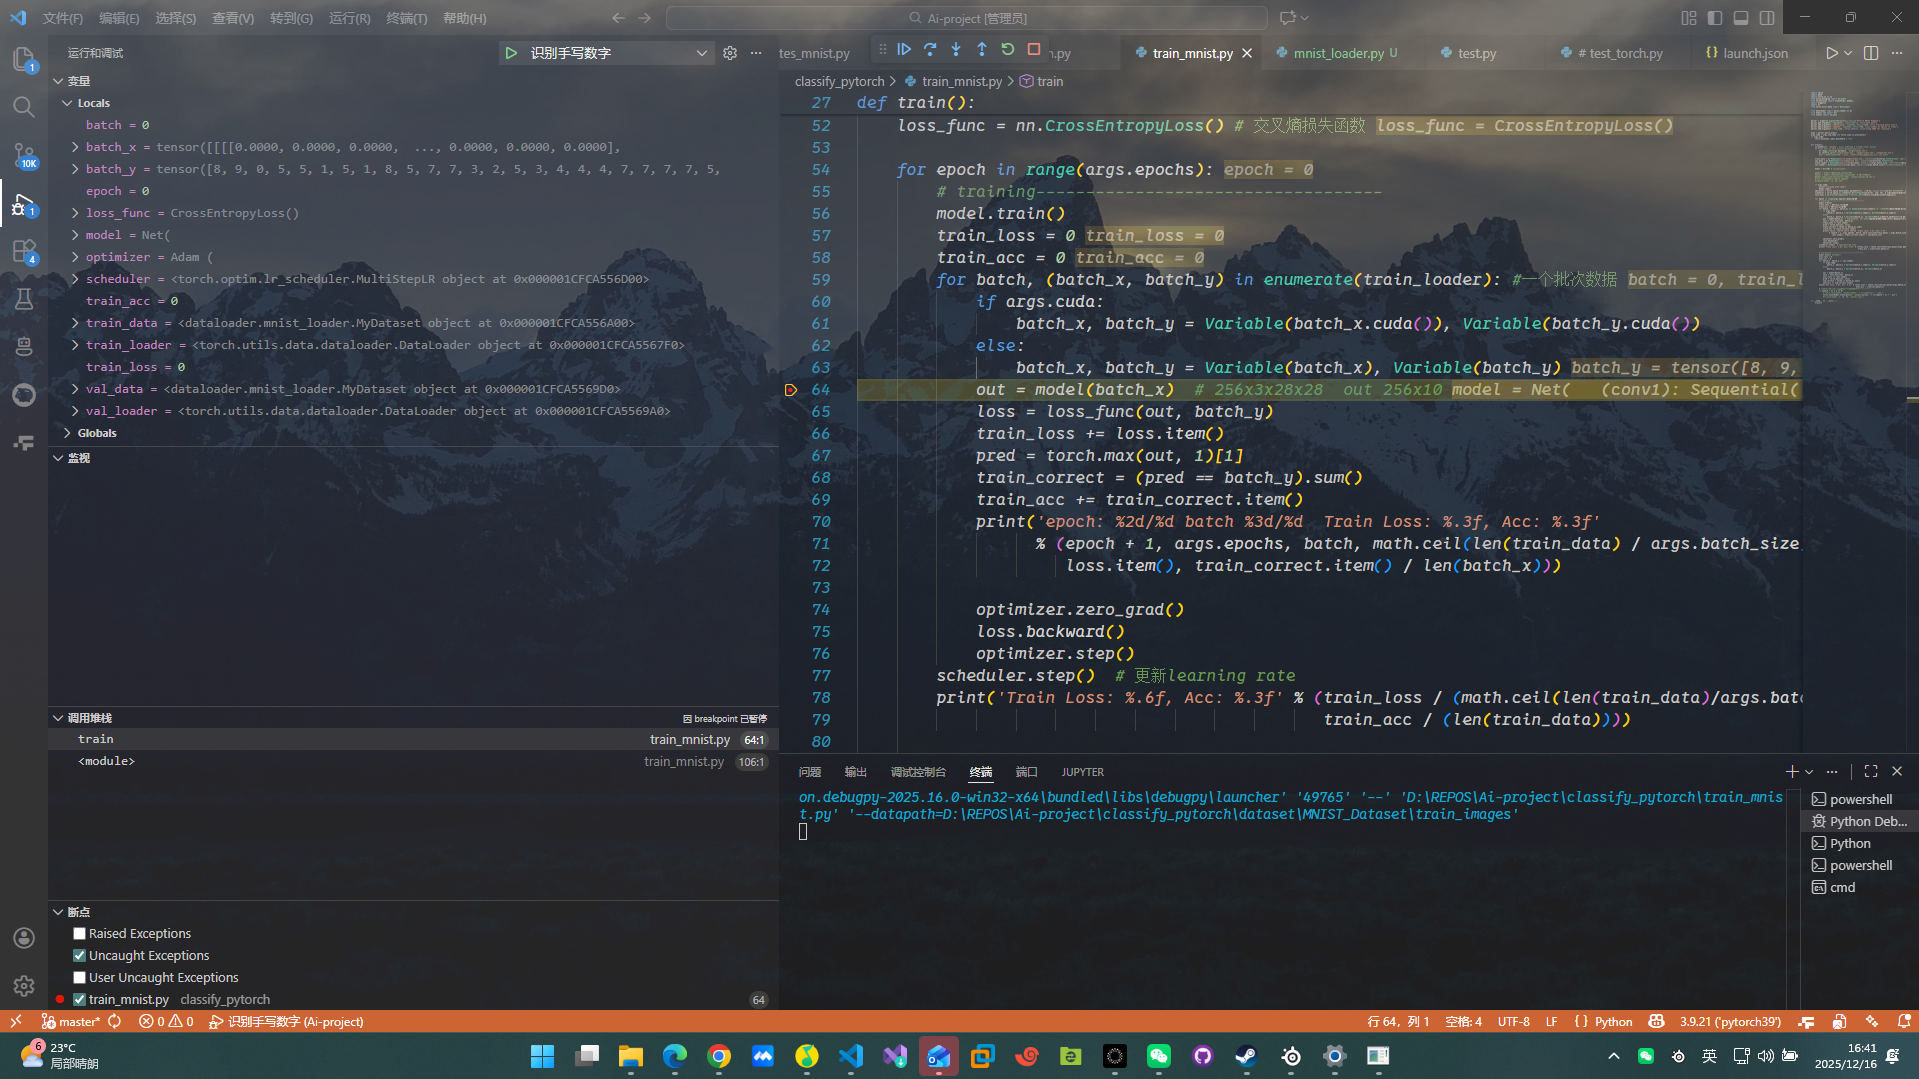

In [ ]:
from IPython.display import Image, display

display(Image(filename='pictures/breakpoint.png'))


输出为256*10，表示一批256个样本，每个图片有10个值，分别表示每个类别的概率。
<small>

概率经过交叉熵函数得到

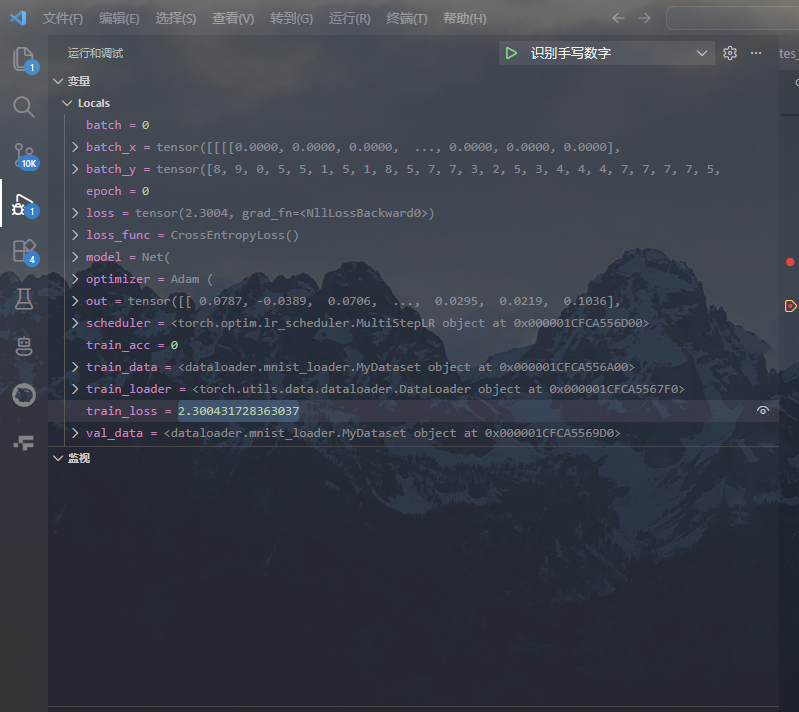

In [6]:
from IPython.display import Image, display

display(Image(filename='pictures/train_loss.png'))


得到损失函数值约为2.3

与标签作比较得到一个批次训练的准确率

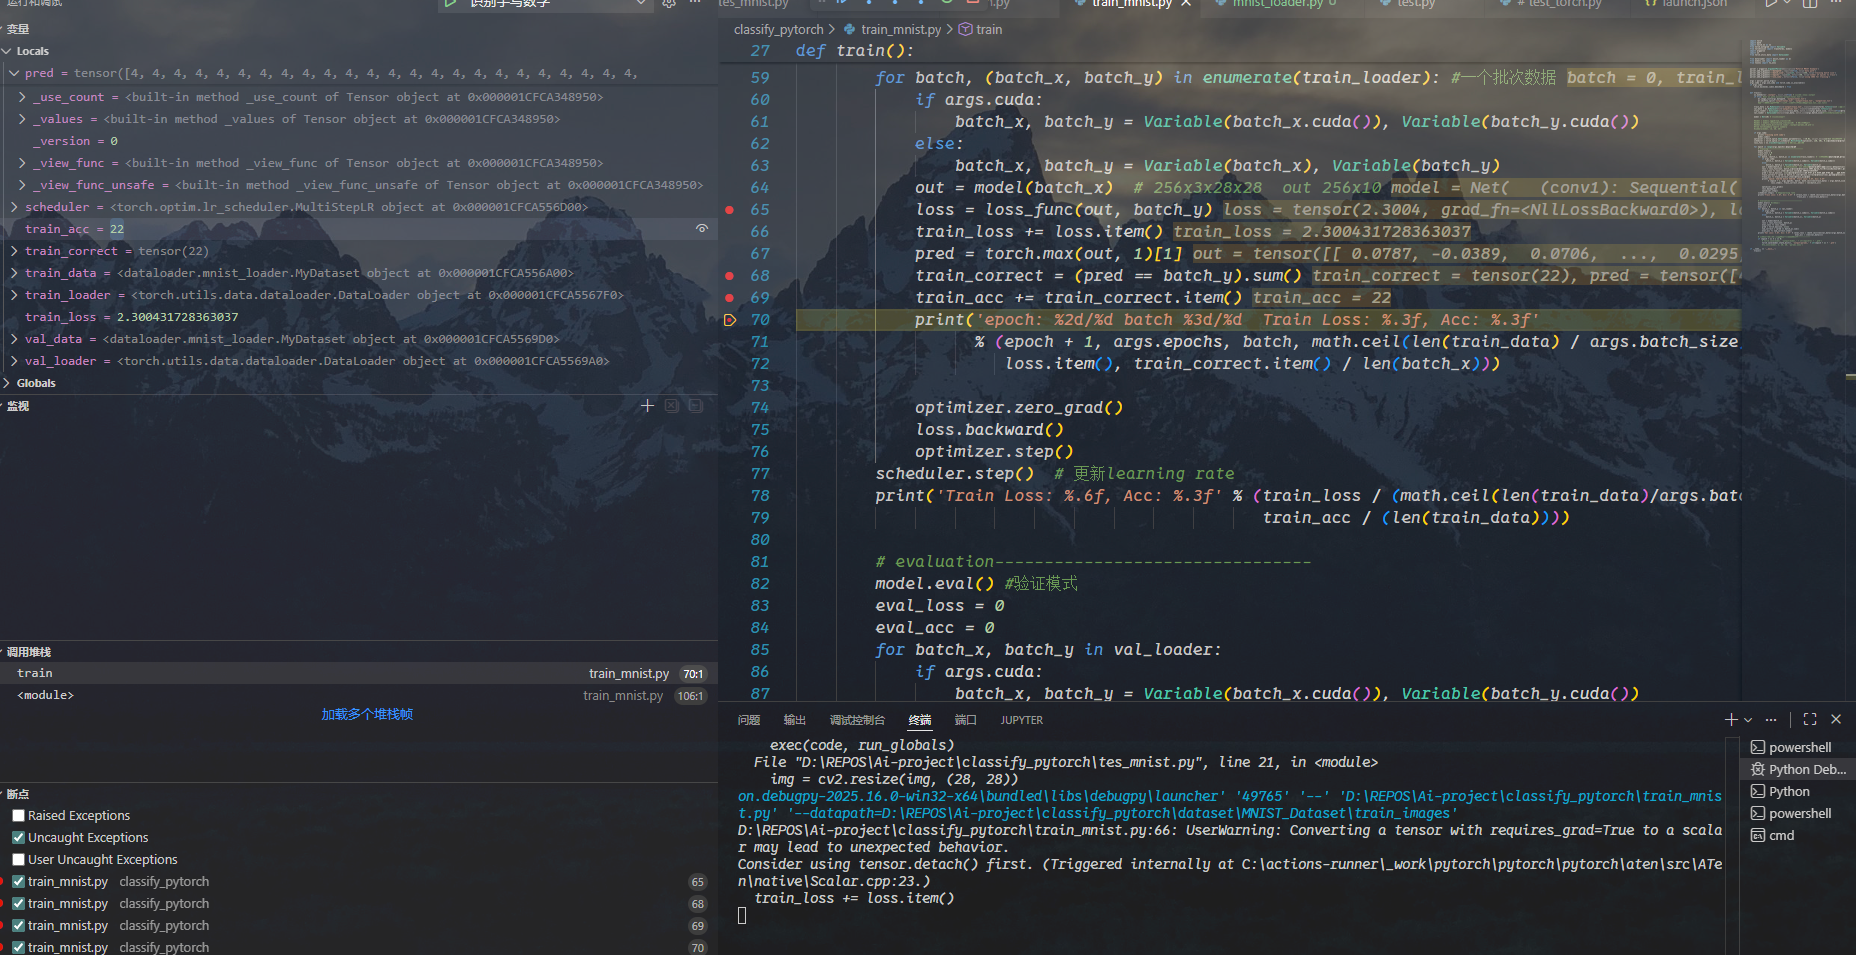

In [7]:
from IPython.display import Image, display

display(Image(filename='pictures/accuracy.png'))


- acc=22，即256个样本中有22个分类正确，准确率为22/256=8.59%，经过多批次训练准确率会提高。

#### 训练结果可视化

导入库

In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable 
from torchvision import transforms
from models.cnn import Net


先调用模型计算出概率，获取预测类别。




In [ ]:
probabilities = torch.nn.functional.softmax(prediction, dim=1)
pred = torch.max(prediction, 1)[1]

创建可视化画布，左侧子图显示输入图像，右侧子图显示预测结果。

<small>

可视化结果：

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # BGR转RGB显示
plt.title(f"read photo\n predict: {pred.item()}")
plt.axis('off')

#### 结果分析

训练50个epoch，分析简单手写数字的识别准确率几乎为100%，为展示效果，使用第三次训练的结果。

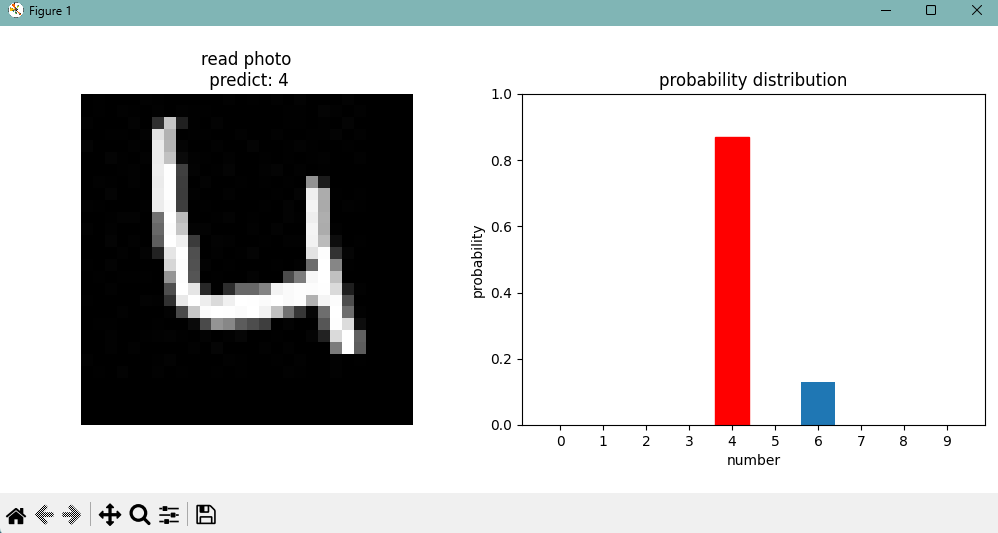

In [13]:
from IPython.display import Image, display

display(Image(filename='pictures/probability.png'))


- 输入图片为数字4，识别为数字4的概率为0.8691